Input file: 2017-09-14_2102-P953_SWISH_054411-430611.hdf
Position: 86.84, -1.67172777777778


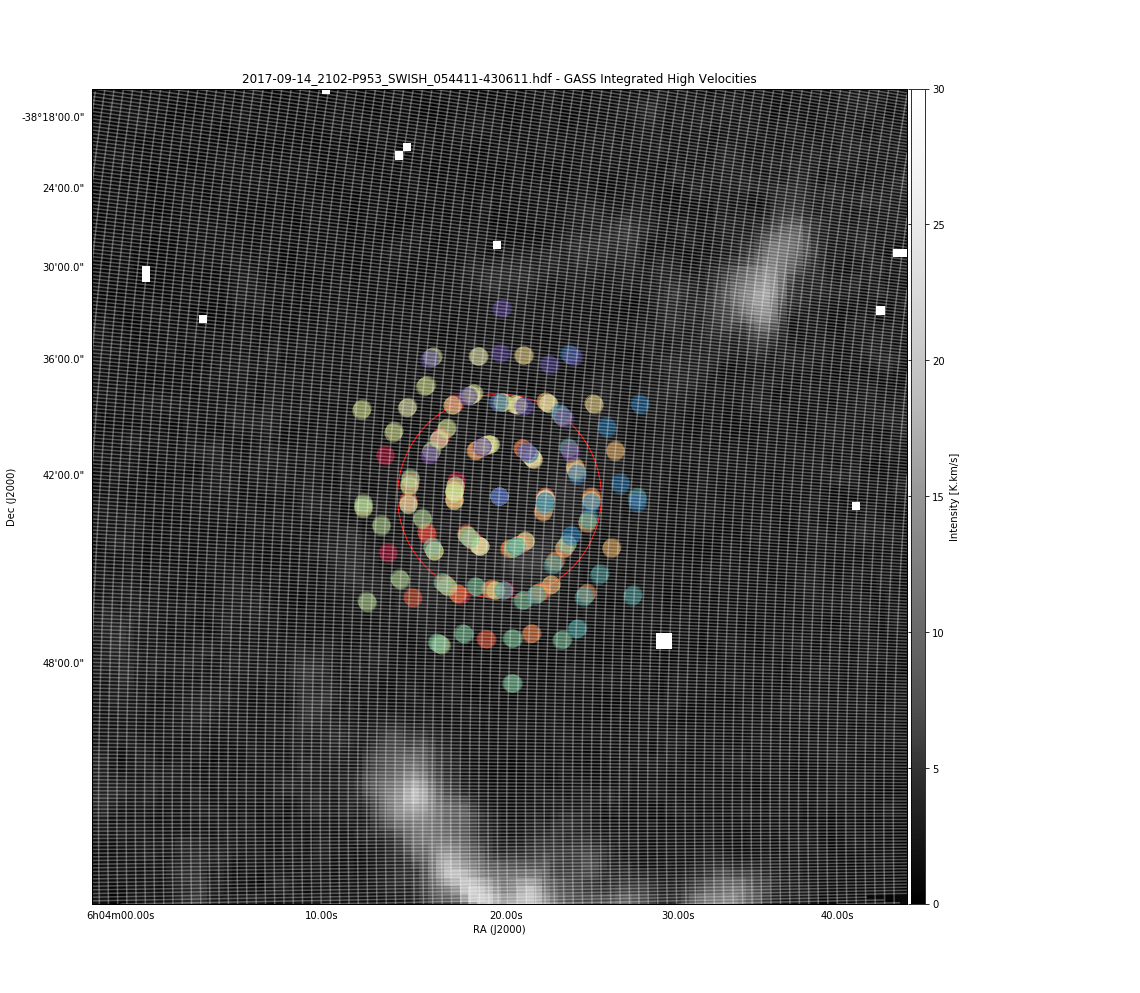

In [6]:
# Import all necessary modules for the code to run including aplpy

from astropy.io import fits
from astropy.io import ascii
import numpy as np
import aplpy
import pandas as pd
import tables as tb
import matplotlib
from matplotlib import *
import datetime

# Ignoring all warnings to reduce output

np.warnings.filterwarnings('ignore')

# Uploading the fits file of the GASS data

%matplotlib inline
hdul = fits.open('GASS_IntegratedIntensity_HighVelocity.fits')

# This provides the information of the fits file

# hdul.info()

# Assign the data to a variable for future use

data = hdul[0].data

# Now assigning the csv file to a variable to read the RA and DEC of each sightline

df = pd.read_csv('P953_Obs_Record.csv')

a = np.arange(len(df['Detected']))
b = []

for i in a:
    b.append([i,df['RA (Decimal)'][i],df['DEC (Decimal)'][i]])

# For each detected sightline, create an array with only these sources using the "detected" column

# for i in a:
#     if df['Detected'][i] == str('Y'):
#         b.append([i,df['RA (Decimal)'][i],df['DEC (Decimal)'][i]])

# v_array = np.arange(len(b)*2).reshape(len(b),2)

# These two variables store the maximum and minimum intensities for the range of the cutout

int_min = 0
int_max = 30

# Which sightline is being cut out. When needed, use the for loop to make cut outs over all sightlines.
# for i in np.arange(len(b)):

# This is the file I will need to work with for the overplotting problem
i = 64

############

fname = '2017-09-14_2102-P953_SWISH_054411-430611.hdf'

def freq2vlsr(ra,dec,fname):

	x = datetime.datetime.strptime(fname.split('-P')[0],'%Y-%m-%d_%H%M')
	date = x.strftime('%Y%b%d:%H:%M').lower()
	path = 'www.narrabri.atnf.csiro.au/cgi-bin/obstools/velo.cgi?radec=%s,%s&velo=0&frame=lsr&type=radio&date=%s&freq1=1420.405752&freq2=&telescope=parkes' % (ra,dec,date)
	path1 = path.replace(':','%3A')
	path2 = 'http://'+path1.replace(',','%2C')

	# Get from online
	f = urllib.request.urlopen(path2)
	for line in f: 
		line = line.decode('utf-8')
		if 'Observatory velocity' in line:
			vel = float(line.split('</td><td>')[1].split()[0])

	return vel

srcname = fname.split('/')[-1]
src = srcname.split('.hdf')[0]
mask = (df['File'] == srcname)
dsub = df[mask]
ra,dec = df['RA (Decimal)'][0],df['DEC (Decimal)'][0]
print('Input file: %s\nPosition: %s, %s' % (srcname,ra,dec))

t = tb.open_file('%s' % fname)

############

GASS_High = aplpy.FITSFigure('GASS_IntegratedIntensity_HighVelocity.fits', dimensions=[0,1], slices=[0], subplot = [0.0, 0.0, 1.5, 1.5])
GASS_High.add_grid()
GASS_High.grid.set_alpha(0.3)

# Add circles for each general beam position

# for j in np.arange(len(b)):
GASS_High.show_circles(b[i][1], b[i][2] ,1, linewidth = 1, edgecolor = 'r')

###########

alph=0.025
sz = 300
GASS_High.show_markers(t.root.scan_pointing.cols.mb01_raj[:],t.root.scan_pointing.cols.mb01_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(0/12.),facecolor=cm.Spectral(0/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb02_raj[:],t.root.scan_pointing.cols.mb02_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(1/12.),facecolor=cm.Spectral(1/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb03_raj[:],t.root.scan_pointing.cols.mb03_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(2/12.),facecolor=cm.Spectral(2/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb04_raj[:],t.root.scan_pointing.cols.mb04_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(3/12.),facecolor=cm.Spectral(3/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb05_raj[:],t.root.scan_pointing.cols.mb05_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(4/12.),facecolor=cm.Spectral(4/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb06_raj[:],t.root.scan_pointing.cols.mb06_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(5/12.),facecolor=cm.Spectral(5/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb07_raj[:],t.root.scan_pointing.cols.mb07_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(6/12.),facecolor=cm.Spectral(6/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb08_raj[:],t.root.scan_pointing.cols.mb08_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(7/12.),facecolor=cm.Spectral(7/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb09_raj[:],t.root.scan_pointing.cols.mb09_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(8/12.),facecolor=cm.Spectral(8/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb10_raj[:],t.root.scan_pointing.cols.mb10_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(9/12.),facecolor=cm.Spectral(9/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb11_raj[:],t.root.scan_pointing.cols.mb11_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(10/12.),facecolor=cm.Spectral(10/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb12_raj[:],t.root.scan_pointing.cols.mb12_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(11/12.),facecolor=cm.Spectral(11/12.),alpha=alph)
GASS_High.show_markers(t.root.scan_pointing.cols.mb13_raj[:],t.root.scan_pointing.cols.mb13_dcj[:],s=sz,marker='o',edgecolor=cm.Spectral(12/12.),facecolor=cm.Spectral(12/12.),alpha=alph)

############


# GASS_High.show_markers(b[i][1], b[i][2],marker = "*", edgecolor = 'r')

GASS_High.show_colorscale(vmin = int_min, vmax = int_max, cmap = 'Greys_r')
GASS_High.add_colorbar()
GASS_High.colorbar.show()
GASS_High.colorbar.set_axis_label_text('Intensity [K.km/s]')
GASS_High.recenter(b[i][1], b[i][2], radius=4)
GASS_High.set_title(df['File'][b[i][0]]+' - GASS Integrated High Velocities')
GASS_High.save(df['File'][b[i][0]]+' - GASS Integrated High Velocities (Beam Overplot)'+".png",adjust_bbox = 'tight')
GASS_High.refresh()